# Week 1 – Linear Classifiers

This notebook demonstrates how a simple linear classifier can separate two classes in 2D. The goal of this week is to understand how weights work to create classification boundaries.

Be sure to run the code cells sequentially. Restart the kernel if errors arises.

In [ ]:
!pip install -q ipywidgets
!pip install -q matplotlib
!pip install -q numpy
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import ipywidgets as widgets

%matplotlib inline

### Defining Simple 2D Points

We’ll start with four simple points at coordinates: (0,0), (1,0), (0,1), and (1,1). We will assign two different classes (red vs. blue) to these points to visualize how a classifier might separate them.

The points and labels we're using model a classic computer science concept: the logical **OR gate**. Think of the coordinates as two inputs (0 for false, 1 for true) and the color as the output.

*   **Red (Class 0)** represents `False`.
*   **Blue (Class 1)** represents `True`.

If you have taken ICS 6B or know some boolean algebra, then you'll be familiar with the these values. 

The OR gate's rule is: "the output is true if at least one of the inputs is true."

| Input 1 (x1) | Input 2 (x2) | Output (y) | Color |
| :----------: | :----------: | :--------: | :---: |
| 0 | 0 | 0 (False) | Red |
| 0 | 1 | 1 (True) | Blue |
| 1 | 0 | 1 (True) | Blue |
| 1 | 1 | 1 (True) | Blue |

This is why only the point at the origin `(0,0)` is red, and all the others are blue. Our goal is to see if a linear classifier can learn this simple logical rule.

In [ ]:
# Define four points in 2D
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

# Labels for OR gate
y = np.array([0, 1, 1, 1])

# Check the data
X, y

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([0, 1, 1, 1]))

### Visualizing the Points

Let's plot the points in 2D to see how they’re arranged.

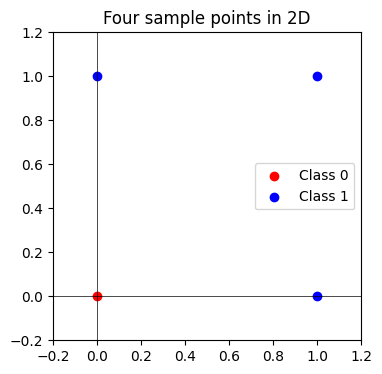

In [3]:
def plot_points(X, y, title="Data points"):
    plt.figure(figsize=(4,4))
    # We'll define class 0 as red and class 1 as blue
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
    # Set scale
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    # Draw axes
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    # Make sure the plot is square
    plt.gca().set_aspect('equal', 'box')
    plt.legend()
    plt.title(title)
    plt.show()

plot_points(X, y, "Four sample points in 2D")

### Introducing a Fixed Linear Classifier

A linear classifier in 2D can be represented as a line:

$w_1 x_1 + w_2 x_2 + b = 0$

One side of the line is Class 0, the other side is Class 1. For Week 1, we choose the weights manually to see how the line behaves. In other words, you are the one finding the parameters with the sliders, not a computer algorithm. In the next lesson, we will explore how a computer can "learn" to find the best weights on its own.

In [ ]:
def plot_linear_classifier(X, y, w, b, title="Linear classifier"):
    # Create line for decision boundary: w1*x + w2*y + b = 0
    x_vals = np.linspace(-0.2, 1.2, 100)
    # Avoid division by zero if w[1] is 0
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + b) / w[1]
    else:
        # Handle vertical line case
        if w[0] == 0: # Avoid division by zero if both weights are zero
            # Cannot draw a line, so we'll just show the points
            plot_points(X, y, "Invalid weights (both zero)")
            return
        x_vals = np.full(100, -b / w[0])
        y_vals = np.linspace(-0.2, 1.2, 100)

    # Check if the classifier correctly classifies the OR gate
    is_valid = True
    for i in range(len(X)):
        point = X[i]
        label = y[i]
        score = np.dot(w, point) + b
        if label == 1 and score <= 0:  # Label should be > 0 for Class 1
            is_valid = False
            break
        if label == 0 and score >= 0:  # Label should be < 0 for Class 0
            is_valid = False
            break
    
    line_color = 'green' if is_valid else 'black'
    
    plt.figure(figsize=(4,4))
    # Plot points
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')

    # Plot decision boundary
    plt.plot(x_vals, y_vals, color=line_color, label='Decision boundary')

    # Add text to the plot to indicate validity
    if is_valid:
        plt.text(-0.15, 1.05, "Valid Boundary!", color='green', fontsize=12)
    else:
        plt.text(-0.15, 1.05, "Invalid Boundary", color='red', fontsize=12)

    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.gca().set_aspect('equal', 'box')
    plt.legend()
    plt.title(title)
    plt.show()

### Exploring the Boundary with Sliders

Now, let's make this interactive. By moving the sliders for the weights (`w1`, `w2`) and the bias (`b`), you can see how the decision boundary changes in real-time. This gives you a feel for how each parameter affects the line's position and orientation.

Think of the black line as a fence that separates the red and blue dots. You can control this fence with three main knobs: `w1`, `w2`, and `b`. Your goal is to find a combination that draws a line to perfectly separate the red dots from the blue dots. When you find a valid boundary, the line will turn green. Play around with the sliders to see how they work together!

*   **`w1` and `w2` (The "Weights")**: These two knobs control the **angle** of the fence. They represent the components of the weight vector `w = [w1, w2]`, which is always perpendicular (normal) to the decision boundary.
    *   Changing `w1` and `w2` rotates the decision boundary.
    *   The magnitude (size) of the weights also influences the steepness of the boundary.

*   **`b` (The "Bias")**: This knob controls the **position** of the fence. It shifts the decision boundary parallel to itself, without changing its orientation.
    *   A positive `b` shifts the line away from the origin.
    *   A negative `b` shifts it closer to the origin.

Experiment with the sliders to build an intuition for how these parameters define the linear classifier.

In [ ]:
# Create a wrapper function to work with ipywidgets
def interactive_plot_linear_classifier(w1, w2, b):
    w = np.array([w1, w2])
    plot_linear_classifier(X, y, w, b, f"w=[{w1:.1f}, {w2:.1f}], b={b:.1f}")

# Interactive sliders
interact(
    interactive_plot_linear_classifier,
    w1=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=round(np.random.uniform(-5.0, 5.0), 1), description="w1"),
    w2=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=round(np.random.uniform(-5.0, 5.0), 1), description="w2"),
    b=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=round(np.random.uniform(-5.0, 5.0), 1), description="b")
);

interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-5.0), FloatSlider(value=-0.5, des…

### Now, is There a Rule for Finding the Right Combination?

Is there a mathematical rule that tells us which combinations of `w1`, `w2`, and `b` will successfully separate the classes?

Try playing around with different values to find a relationship between the 3 variables and the 4 points that guarantee a valid boundary line.

<details>
<summary>Click to reveal the answer!</summary>

**Yes, there is!** For a linear classifier to work, all points of one class must lie on one side of the decision boundary, and all points of the other class must lie on the other side.

Mathematically, for every point `(x1, x2)` with label `y`:
*   If `y` is Class 1 (blue), we need `w1*x1 + w2*x2 + b > 0`.
*   If `y` is Class 0 (red), we need `w1*x1 + w2*x2 + b < 0`.

A "correct" combination of `w1`, `w2`, and `b` is one where these two conditions are met for **all** of our data points. 

### Verify 

Don't just take our word for it, try it out yourself!

1.  **Pick Your Values**: Choose some values for `w1`, `w2`, and `b`.
2.  **Do the Math by Hand**: For each of the four data points, check if your values satisfy the inequalities.
    *   For blue points (Class 1), is `w1*x1 + w2*x2 + b > 0`?
    *   For red points (Class 0), is `w1*x1 + w2*x2 + b < 0`?
3.  **Plot and Verify**: Now, use the interactive sliders to input your chosen values. Does the plot show a correct separation? Does it match what you calculated?

</details>

### Limitations of a Linear Classifier

Linear classifiers can only separate data with a straight line. 

Is it possible for a Linear Classifier to replicate a XOR gate? Why or why not?

Here is the truth table for the XOR gate:

| Input 1 (x1) | Input 2 (x2) | Output (y) | Color |
| :----------: | :----------: | :--------: | :---: |
| 0 | 0 | 0 (False) | Red |
| 0 | 1 | 1 (True) | Blue |
| 1 | 0 | 1 (True) | Blue |
| 1 | 1 | 0 (False) | Red |


Run the code block below to visualize the XOR representation on a graph

Try to find a valid boundary for the XOR gate using the sliders below. Is it possible to make a linearly seperable boundary?

In [21]:
# Labels for XOR gate
y_xor = np.array([0, 1, 1, 0])


# Create a wrapper function to work with ipywidgets for the XOR gate
def interactive_plot_xor_classifier(w1, w2, b):
    w = np.array([w1, w2])
    plot_linear_classifier(X, y_xor, w, b, f"w=[{w1:.1f}, {w2:.1f}], b={b:.1f}")

# Use ipywidgets to create interactive sliders for the XOR gate
interact(
    interactive_plot_xor_classifier,
    w1=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=round(np.random.uniform(-5.0, 5.0), 1), description="w1"),
    w2=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=round(np.random.uniform(-5.0, 5.0), 1), description="w2"),
    b=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=round(np.random.uniform(-5.0, 5.0), 1), description="b")
);

interactive(children=(FloatSlider(value=1.4, description='w1', max=5.0, min=-5.0), FloatSlider(value=1.3, desc…

The answer is no, it is not possible to find a single linear boundary that separates the classes in the XOR pattern.

No matter how you adjust the weights and bias, it's impossible to find a green line that correctly separates all the points.

This limitation motivates why we need more advanced techniques beyond linear classifiers.

In the next week, we’ll learn how the perceptron algorithm can search for good weights automatically. Later, we'll see why we need multilayer networks for nonlinear patterns.

**In Week 2, we’ll turn this static picture into a learning algorithm: the perceptron.**